In [1]:
import pandas as pd

data = pd.read_csv("data/synthetic_data_lung_cancer.csv")
print(data.columns)

Index(['SUBJECT_ID', 'DEFINITION_ID', 'TIME'], dtype='object')


In [2]:
# Splitting 'DEFINITION_ID' into multiple columns
new_cols = data['DEFINITION_ID'].str.split('_', expand=True)

# Naming the new columns
new_cols.columns = ['CATEGORY', 'CATEGORY_ID']

# Pivoting the DataFrame
pivot_new_cols = new_cols.pivot_table(index=data.index, columns='CATEGORY', values='CATEGORY_ID', aggfunc=lambda x: ', '.join(str(v) for v in x)).fillna('-1')

print(pivot_new_cols.columns)

Index(['condition', 'death', 'drug', 'measurement', 'observation',
       'procedure'],
      dtype='object', name='CATEGORY')


In [3]:
# Concatenating the new columns to the original DataFrame
df = pd.concat([data, pivot_new_cols], axis=1)

# Dropping the original 'DEFINITION_ID' column
df.drop(columns=['DEFINITION_ID'], inplace=True)

# Filling the death column 
df['death'] = df['death'].replace('None', '1')
df['death'] = df['death'].replace('-1', '0')
# Converting column to boolean dtype
df['death'] = df['death'].astype(int)

print(df.columns)
#df.loc[(df['condition']=='')&(df['drug']=='')&(df['measurement']=='')&(df['observation']=='')&(df['procedure']=='')]
print([len(df['condition'].unique()),
len(df['drug'].unique()),
len(df['observation'].unique()),
len(df['procedure'].unique())])

print(['0' in (df['condition'].unique()),
'0' in (df['drug'].unique()),
'0' in (df['observation'].unique()),
'0' in (df['procedure'].unique())])

df.head()

Index(['SUBJECT_ID', 'TIME', 'condition', 'death', 'drug', 'measurement',
       'observation', 'procedure'],
      dtype='object')
[2400, 419, 225, 491]
[False, False, False, False]


,SUBJECT_ID,TIME,condition,death,drug,measurement,observation,procedure
0,1,0.004807,-1,0,217,-1,-1,-1
1,1,0.008643,1922,0,-1,-1,-1,-1
2,1,0.027792,785,0,-1,-1,-1,-1
3,1,0.032515,-1,0,49,-1,-1,-1
4,1,0.056765,-1,0,-1,132,-1,-1


In [4]:
#dummies for categorical analysis

df = pd.get_dummies(df,columns=['condition','drug','measurement','observation','procedure'])
df.head()



,SUBJECT_ID,TIME,death,condition_-1,condition_1,condition_10,condition_100,condition_1000,condition_1001,condition_1002,...,procedure_90,procedure_91,procedure_92,procedure_93,procedure_94,procedure_95,procedure_96,procedure_97,procedure_98,procedure_99
0,1,0.004807,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0.008643,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0.027792,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0.032515,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,0.056765,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
from sklearn.model_selection import train_test_split

# First, create a list of unique SUBJECT_IDs
unique_subject_ids = df['SUBJECT_ID'].unique()

# Then, split the unique_subject_ids into train and test IDs
train_ids, test_ids = train_test_split(unique_subject_ids, test_size=0.2, random_state=2)

# Filter the main DataFrame into train and test sets based on the selected IDs
train_data = df[df['SUBJECT_ID'].isin(train_ids)]
test_data = df[df['SUBJECT_ID'].isin(test_ids)]

# Separate the features (X) and target variable (y) for train and test sets
X_train = train_data.drop('death',axis=1).drop(['condition_-1','drug_-1','measurement_-1','observation_-1','procedure_-1'],axis=1)  # Drop 'SUBJECT_ID' and target column
y_train = pd.Series(train_data.death)

X_test = test_data.drop('death',axis=1).drop(['condition_-1','drug_-1','measurement_-1','observation_-1','procedure_-1'],axis=1)  # Drop 'SUBJECT_ID' and target column
y_test = pd.Series(test_data.death)
#old way:
#X = df.drop('death',axis=1).drop(['condition_-1','drug_-1','measurement_-1','observation_-1','procedure_-1'],axis=1)
#y = pd.Series(df.death)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print(y_train.head())
X_train.head()

0    0
1    0
2    0
3    0
4    0
Name: death, dtype: int32


,SUBJECT_ID,TIME,condition_1,condition_10,condition_100,condition_1000,condition_1001,condition_1002,condition_1003,condition_1004,...,procedure_90,procedure_91,procedure_92,procedure_93,procedure_94,procedure_95,procedure_96,procedure_97,procedure_98,procedure_99
0,1,0.004807,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0.008643,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0.027792,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0.032515,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,0.056765,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
from imblearn.combine import SMOTEENN

print("Before: "+str(len(X_train)))

#sampling 
smote_enn = SMOTEENN()


sample_strategy =smote_enn


#X_train, y_train = sample_strategy.fit_resample(X_train, y_train)
print("After: "+str(len(X_train)))

Before: 464916
After: 464916


In [7]:
#feature selection
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: death, dtype: int32

In [8]:
# no scaling necessary

In [9]:
from sklearn.ensemble import RandomForestClassifier

# model
rf = RandomForestClassifier(n_estimators=100,criterion="gini",max_features=100,max_depth=4)
model = rf

#fit model
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=100)

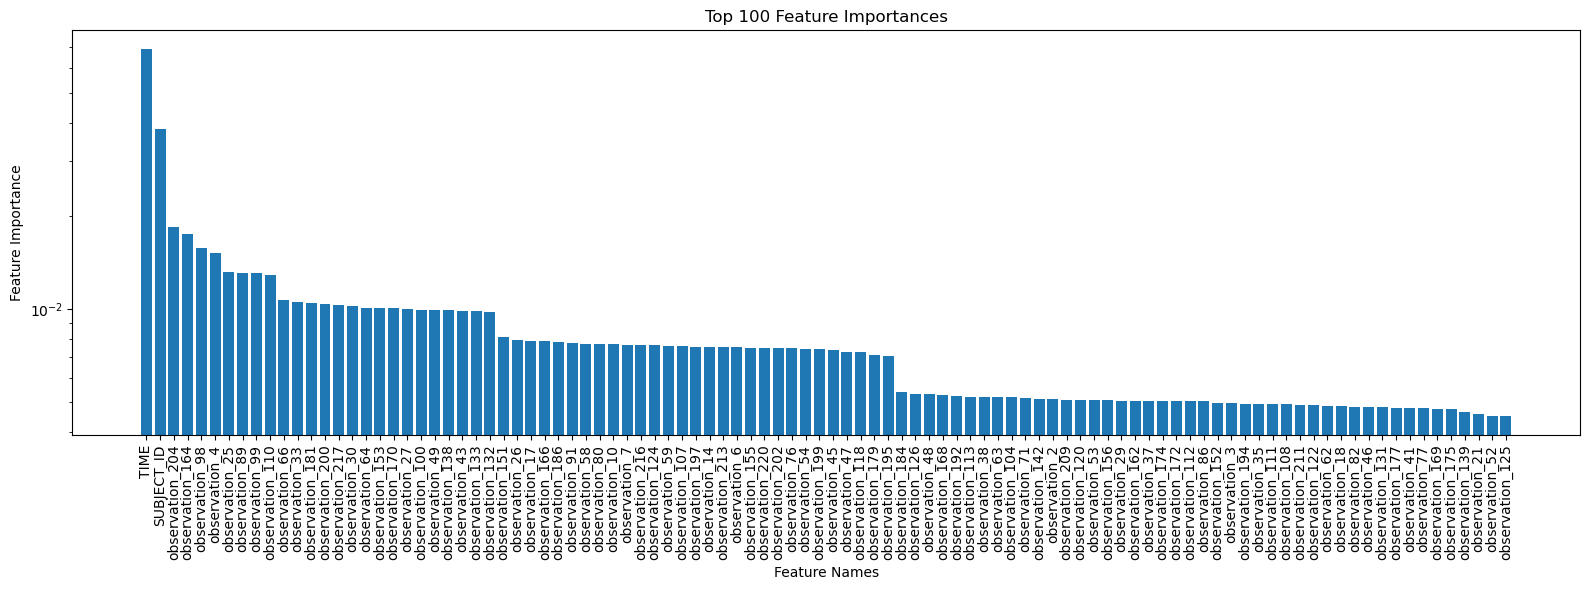

In [10]:
import numpy as np
import matplotlib.pyplot as plt


# Get feature importances
feature_importances = rf.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Limit the number of features to display (top 100)
top_n = 100
indices = indices[:top_n]
feature_importances = feature_importances[indices]
feature_names = feature_names[indices]

# Plot feature importances (top 100)
plt.figure(figsize=(16, 6))
plt.title("Top 100 Feature Importances")
plt.bar(range(top_n), feature_importances, align="center")
plt.xticks(range(top_n), feature_names, rotation=90)
plt.xlabel("Feature Names")
plt.ylabel("Feature Importance")
plt.yscale('log')
plt.tight_layout()
plt.show()

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#cross validation
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
print(scores)

[0.6486936  0.60830253 0.52031978 0.63832944 0.55848859]


In [12]:


#predict probabilities
probs = model.predict_proba(X_test)
probs = pd.DataFrame(probs)
probs = pd.Series(probs.iloc[:, 1])

# Calculate AUC
auc = roc_auc_score(y_test.values, probs)
print("AUC:", auc)

AUC: 0.5691619318181819
